In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import pickle

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

from fig_code import visualize_tree, plot_tree_interactive

import seaborn; seaborn.set()
%matplotlib inline

In [2]:
#Train Data
data = pd.read_csv("C:/Users/vibho/Desktop/NEU/SEM04/BigDataSystemsAndIntelligenceAnalytics_CSYE7245_38101/Project/Data/train.csv")

In [3]:
#Test Data
test = pd.read_csv("C:/Users/vibho/Desktop/NEU/SEM04/BigDataSystemsAndIntelligenceAnalytics_CSYE7245_38101/Project/Data/test.csv")

In [4]:
data.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
data['label']

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
#Check the data
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

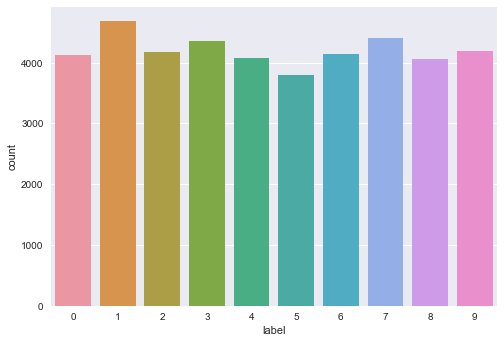

In [10]:
#data['label'].value_counts().plot(kind='bar')
sns.set(style="darkgrid")
ax = sns.countplot(x="Digits", data=data)

In [11]:
data = data.as_matrix()
test = test.as_matrix()

In [14]:
#Identify the Features(X) and Response variable(y)
X = data[:,1:]
y = data[:,0]

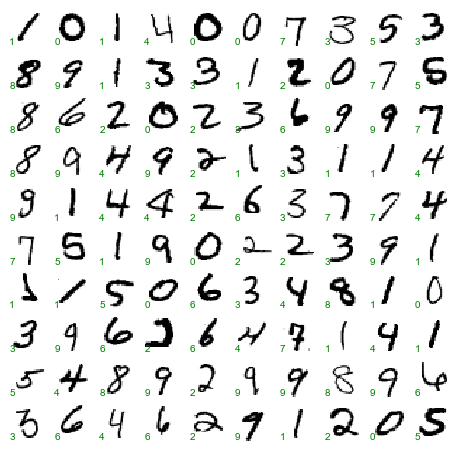

In [301]:
#Visualize the sample data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(X[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

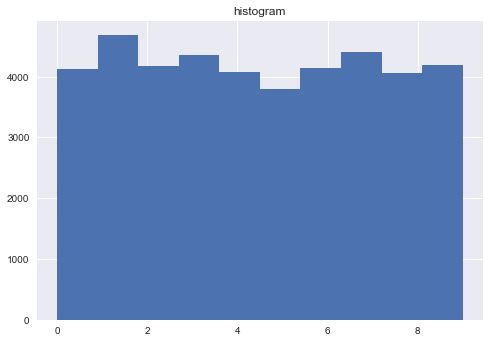

In [40]:
#plt.hist(y) 
#plt.title("histogram") 
#plt.show()

In [15]:
#Test-Train Split of Data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.25, random_state=0)

# Decision-Tree

In [324]:
#Decision-Tree model
clf_dt = DecisionTreeClassifier()

In [325]:
#Tuning hyper parameter 'max_depth' with cross validation fold 5
dt_accuracies = []
for n in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
    clf_df = DecisionTreeClassifier(max_depth=n)
    dt_accuracies.append(cross_val_score(clf_df,Xtrain,ytrain,cv=5).mean())

In [54]:
dt_accuracies # results without binarized y

[0.19349987411467595,
 0.6827386025453255,
 0.8459050502248904,
 0.8576181986876689,
 0.8565705143544788,
 0.8550708569144605,
 0.8541900518563189,
 0.854475990012733,
 0.8551897515269247,
 0.8558094086169146,
 0.8544276114721981,
 0.8539046691011276]

In [305]:
#dt_accuracies results with binarized y

[0.0,
 0.5935555555555556,
 0.820888888888889,
 0.843015873015873,
 0.8424761904761905,
 0.8416825396825397,
 0.8412698412698413,
 0.8408888888888889,
 0.8404126984126984,
 0.8418095238095237,
 0.8432063492063492,
 0.8391746031746032]

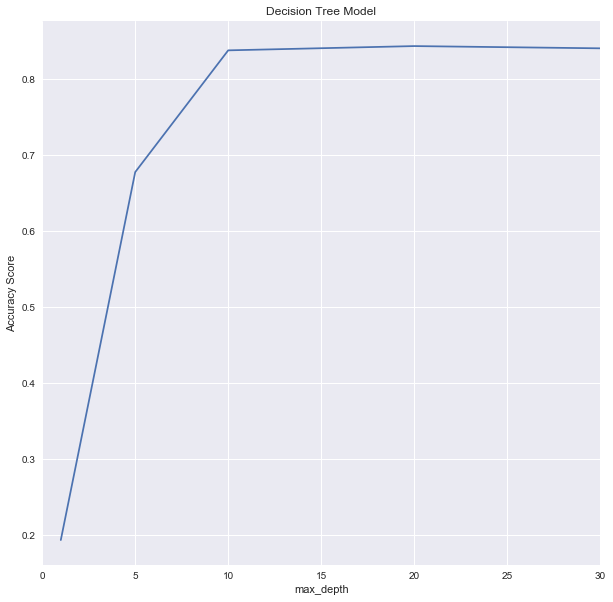

In [317]:
#Plotting accuracies vs max-depth
plt.figure(figsize=(10,10))
plt.plot([1, 5, 10, 20, 30,40,50,60,70,80,90,100], dt_accuracies)
plt.xlim([0.0, 30])
#plt.ylim([0.0, 1.0])
plt.title('Decision Tree Model')
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.grid(True)

In [318]:
#Fitting the model
clf_dt = DecisionTreeClassifier(max_depth=10)
clf_dt.fit(Xtrain,ytrain)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          n_jobs=1)

In [326]:
# save the model to disk
filename_dt = 'PickleFiles/finalized_dt_model.sav'
pickle.dump(clf_dt, open(filename_dt, 'wb'))

In [327]:
# load the model from disk
loaded_dt_model = pickle.load(open(filename_dt, 'rb'))

In [321]:
#Predicted values
predict_dt = loaded_dt_model.predict(Xtest)

In [253]:
#Accuracy Score
result_dt = loaded_dt_model.score(Xtest, ytest)
print(result_dt)

0.8561904761904762


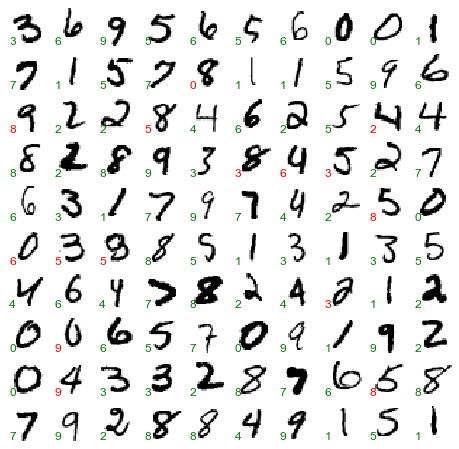

In [87]:
#Visualize the predicted data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(Xtest[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_dt[i]),
              transform=ax.transAxes, color='green' if (ytest[i] == predict_dt[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [194]:
#Confusion Matrix
cm = confusion_matrix(ytest,predict_dt)
print(cm)

[[ 922    3   12   10    7   19    9    5   15   13]
 [   2 1135   13   12    5    4    3    2    8    6]
 [  20   17  880   29   23   16   29   26   25   12]
 [   7   15   33  865   12   53   10   25   34   16]
 [   3   10   10    7  863   17   19   11   31   63]
 [  13    5   15   49    5  748   33    6   24   32]
 [  21   10   18    5   17   23  933    2    9    6]
 [   3    5   26   10   22    9    2 1009   11   32]
 [  11   21   18   35   22   42   20    9  782   35]
 [   6    3    9   25   38   21    7   34   20  853]]


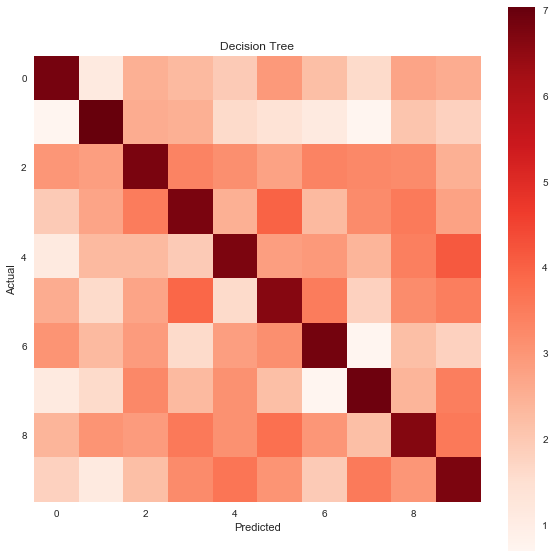

In [229]:
#Heat Map
plt.figure(figsize=(10,10))
plt.imshow(np.log(confusion_matrix(ytest,predict_dt)),cmap='Reds', interpolation='nearest')
plt.grid(False)
plt.colorbar ()
plt.title('Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted');

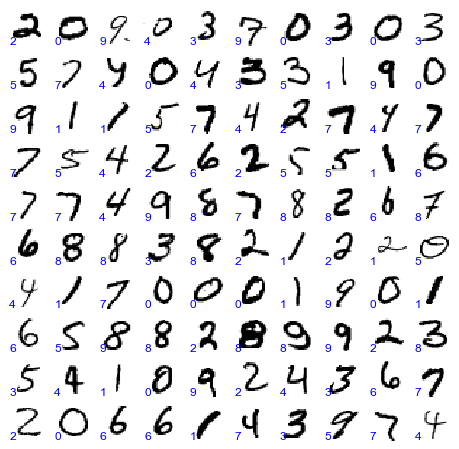

In [89]:
#Visualize the predicted data in test dataset
predict_act_dt = loaded_dt_model.predict(test)
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(test[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_act_dt[i]),
              transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

# Logistic Regression

In [25]:
#Logistic Regression model
logreg = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
#Tuning hyper parameter 'C' with cross validation fold 5
lr_accuracies = []
for c in [0.001,0.01,0.1,1,10,100]:
    logreg = LogisticRegression(C=c)
    lr_accuracies.append(cross_val_score(logreg,Xtrain,ytrain,cv=5).mean())     

In [209]:
lr_accuracies

[0.9039374609209168,
 0.9015884050586636,
 0.8992708636140223,
 0.8982233954820333,
 0.8971439545025095,
 0.8972387743650628]

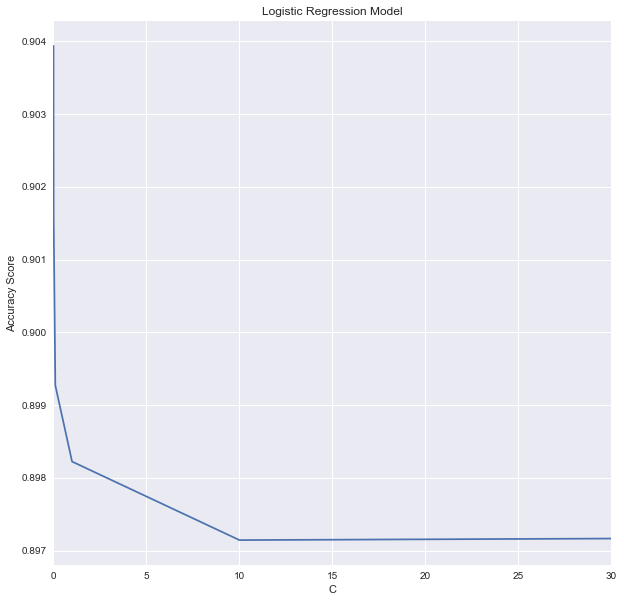

In [212]:
#Plotting accuracies vs C

plt.figure(figsize=(10,10))
plt.plot([0.001,0.01,0.1,1,10,100], lr_accuracies)
plt.xlim([0.0, 30])
#plt.ylim([0.0, 1.0])
plt.title('Logistic Regression Model')
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.grid(True)   

In [216]:
#Fitting the model
logreg = LogisticRegression(C=1)
logreg.fit(Xtrain,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [246]:
# save the model to disk
filename_lr = 'PickleFiles/finalized_lr_model.sav'
pickle.dump(logreg, open(filename_lr, 'wb'))

In [248]:
# load the model from disk
loaded_lr_model = pickle.load(open(filename_lr, 'rb'))
result_lr = loaded_lr_model.score(Xtest, ytest)
print(result_lr)

0.9036190476190477


In [226]:
#Predict Values on Test Data and Check Accuracy
predict_logreg = loaded_lr_model.predict(Xtest)
print(metrics.accuracy_score(ytest, predict_logreg) * 100)

90.36190476190477


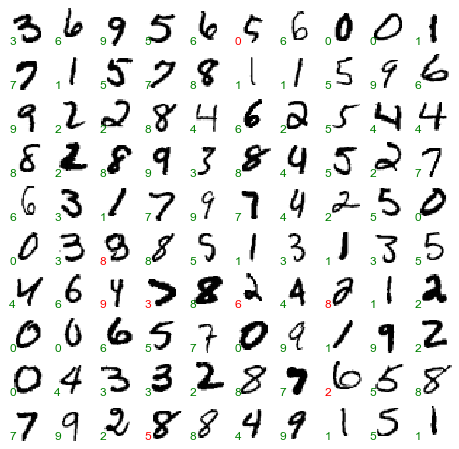

In [231]:
#Visualize the predicted data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(Xtest[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_logreg[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == predict_logreg[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [227]:
#Confusion Matrix
cm = confusion_matrix(ytest,predict_logreg)
print(cm)

[[ 966    0    5    3    3    5   16    1   13    3]
 [   0 1124   16    8    1    3    4    1   27    6]
 [  12   18  950   25   12    5   11   14   27    3]
 [   5    9   32  934    3   35    5    7   26   14]
 [   6   13    9    3  933    4    7    2   16   41]
 [  10   14    4   32    6  801   16    3   33   11]
 [   6    0   11    0    8   18  995    0    6    0]
 [   5   13   13    5   15    3    1 1028    7   39]
 [   5   15    7   29    4   35   13    3  868   16]
 [   4    2    5   13   28   10    0   49   16  889]]


C:\Users\vibho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


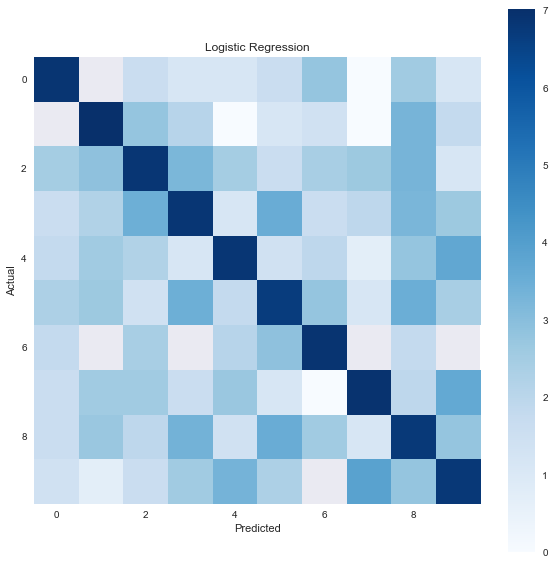

In [230]:
#Heat Map
plt.figure(figsize=(10,10))
plt.imshow(np.log(confusion_matrix(ytest,predict_logreg)),cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.colorbar ()
plt.title('Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted');

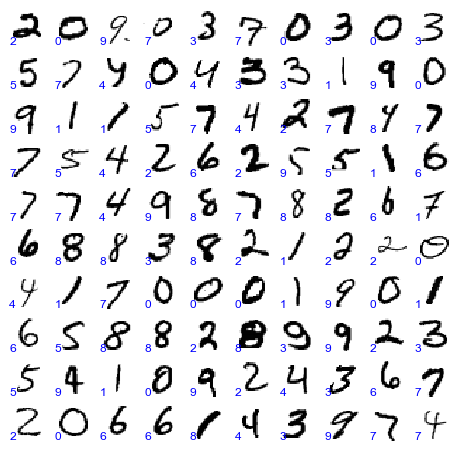

In [232]:
#Visualize the predicted data in test dataset
predict_act_lr = loaded_lr_model.predict(test)
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(test[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_act_lr[i]),
              transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

# Random Forests

In [348]:
#Random Forests Model
clf_rf = RandomForestClassifier()
clf_rf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [349]:
predict_rf = clf_rf.predict(Xtest)
metrics.accuracy_score(ytest,predict_rf)

0.8365714285714285

In [ ]:
#1. Tuning hyper parameters 'max_depth' and 'n' together with cross validation fold 5
i=0;
rf_accuracies = []
for n in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
    for md in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
        clf_rf = RandomForestClassifier(n_estimators=n,max_depth=md)
        rf_accuracies.append(cross_val_score(clf_rf,X,y,cv=5).mean())
        print ("N =",n,"Md =",md,rf_accuracies[i])
        i=i+1

N = 1 Md = 1 0.0
N = 1 Md = 5 0.4046666666666667
N = 1 Md = 10 0.7300000000000001
N = 1 Md = 20 0.7930714285714286
N = 1 Md = 30 0.7896666666666667
N = 1 Md = 40 0.7902857142857143
N = 1 Md = 50 0.7877380952380953
N = 1 Md = 60 0.7941666666666667
N = 1 Md = 70 0.7923809523809524
N = 1 Md = 80 0.7947380952380951
N = 1 Md = 90 0.7965238095238096
N = 1 Md = 100 0.7960714285714285
N = 5 Md = 1 0.0
N = 5 Md = 5 0.34264285714285714
N = 5 Md = 10 0.7806190476190477
N = 5 Md = 20 0.8501428571428571
N = 5 Md = 30 0.8492142857142857
N = 5 Md = 40 0.8508571428571429
N = 5 Md = 50 0.8481666666666667
N = 5 Md = 60 0.8497619047619048
N = 5 Md = 70 0.8537142857142858
N = 5 Md = 80 0.8480238095238095
N = 5 Md = 90 0.8486428571428573
N = 5 Md = 100 0.8507857142857143
N = 10 Md = 1 0.0
N = 10 Md = 5 0.32399999999999995
N = 10 Md = 10 0.8
N = 10 Md = 20 0.839952380952381
N = 10 Md = 30 0.8351428571428571
N = 10 Md = 40 0.8389285714285715
N = 10 Md = 50 0.8326428571428572
N = 10 Md = 60 0.8354523809523808

In [233]:
maximum = max(rf_accuracies[0:143])
print(maximum)

#Maximum for n=90 & md=30

0.9646672870713401


In [156]:
#Plotting hyperparameters vs accuracy
# narr = []
# mdarr = []
# for n in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
#     for md in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
#         narr.append(n)
#         md.append(md)

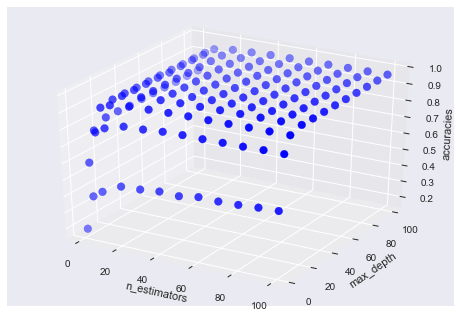

In [235]:
#3D Plot
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
 

# # plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# X = narr
# Y = mdarr
# Z = rf_accuracies
# ax.scatter(X,Y,Z, c='blue', s=60)
# ax.set_xlabel('n_estimators')
# ax.set_ylabel('max_depth')
# ax.set_zlabel('accuracies')
# plt.show()


####
#sum1 = []
#for i in range(0,len(rf_accuracies)-1,12):
#    sum1.append((sum(rf_accuracies[i:i+11]))/12)  

In [ ]:
#2a. Tuning one hyper parameter 'n_estimators' with cross validation fold 5
rf_accuracies01 = []
for n in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
    clf_rf = RandomForestClassifier(n_estimators=n)
    rf_accuracies01.append(cross_val_score(clf_rf,X,y,cv=5).mean())

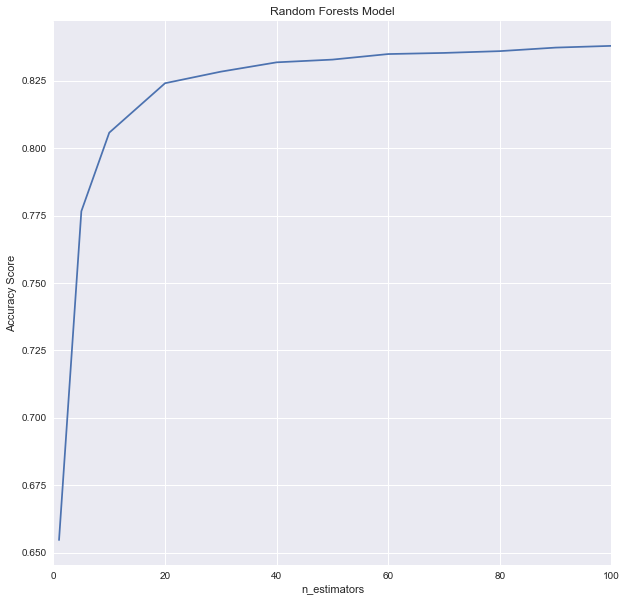

In [148]:
plt.figure(figsize=(10,10))
plt.plot([1, 5, 10, 20, 30,40,50,60,70,80,90,100], rf_accuracies01)
plt.xlim([0.0, 100])
#plt.ylim([0.0, 1.0])
plt.title('Random Forests Model')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.grid(True)

In [38]:
#2b. Tuning one hyper parameter 'max_depth' with cross validation fold 5
rf_accuracies02 = []
for n in [1, 5, 10, 20, 30, 40,50,60,70,80,90,100]:
    clf_rf = RandomForestClassifier(n_estimators=40,max_depth=n)
    rf_accuracies02.append(cross_val_score(clf_rf,X,y,cv=5).mean())

In [39]:
rf_accuracies02

[0.5001439761921789,
 0.8502158814585655,
 0.9397390147015523,
 0.959262340027671,
 0.9602622637551267,
 0.9608097864740394,
 0.9594525016438455,
 0.9597862771460383,
 0.9585004237362578,
 0.9605958124668239,
 0.9600950613528264,
 0.9601670907430402]

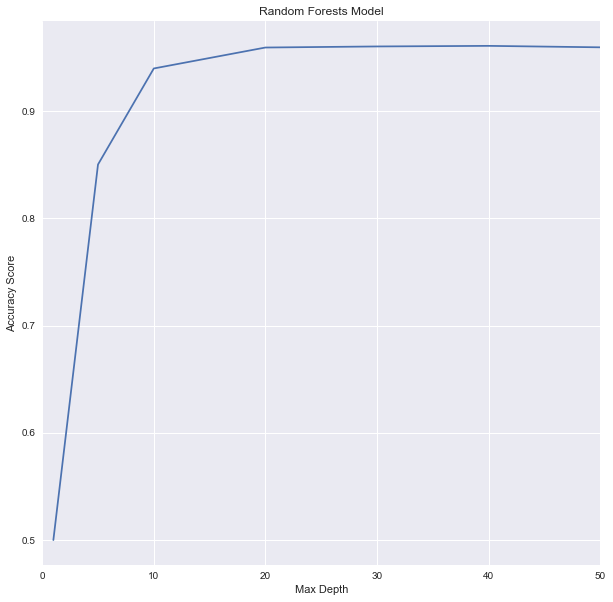

In [40]:
plt.figure(figsize=(10,10))
plt.plot([1, 5, 10, 20, 30,40,50,60,70,80,90,100], rf_accuracies02)
plt.xlim([0.0, 50])
#plt.ylim([0.0, 1.0])
plt.title('Random Forests Model')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)

In [239]:
clf_rf = RandomForestClassifier(n_estimators=90,max_depth=30)
clf_rf.fit(Xtrain,ytrain)

In [254]:
# save the model to disk
filename_rf = 'PickleFiles/finalized_rf_model.sav'
pickle.dump(clf_rf, open(filename_rf, 'wb'))

In [255]:
#load the model from disk
loaded_rf_model = pickle.load(open(filename_rf, 'rb'))
result_rf = loaded_rf_model.score(Xtest, ytest)
print(result_rf)

0.9632380952380952


In [244]:
#Predict Values on Test Data and Check Accuracy
predict_rf = loaded_rf_model.predict(Xtest)
print(metrics.accuracy_score(ytest, predict_rf) * 100)

96.32380952380953


In [ ]:
#Visualize the predicted data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(Xtest[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_rf[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == predict_rf[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [256]:
#Confusion Matrix
cm = confusion_matrix(ytest,predict_rf)
print(cm)

[[ 988    0    1    1    3    2    9    0   11    0]
 [   0 1172    8    3    1    1    3    0    2    0]
 [   5    1 1044    5    2    1    6    8    5    0]
 [   3    0   16 1013    0   11    3    8   11    5]
 [   2    3    1    0  997    0    5    1    2   23]
 [   3    1    1   10    1  898    7    1    4    4]
 [   5    0    0    0    2   11 1024    0    2    0]
 [   1    5   15    1    6    1    0 1080    5   15]
 [   3    3    6   17    3   10    7    1  937    8]
 [   9    2    2    8    9    2    1   14    8  961]]


C:\Users\vibho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


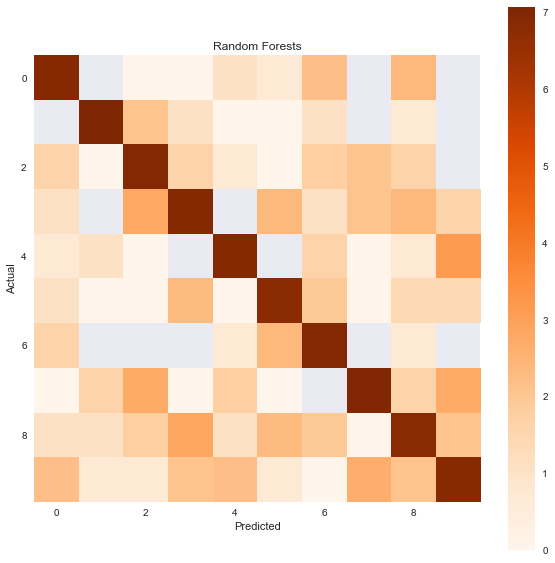

In [245]:
#Confusion Matrix Heatmap
plt.figure(figsize=(10,10))
plt.imshow(np.log(confusion_matrix(ytest,predict_rf)),cmap='Oranges', interpolation='nearest')
plt.grid(False)
plt.colorbar ()
plt.title('Random Forests')
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [ ]:
#Visualize the predicted data in test dataset
predict_act_rf = loaded_rf_model.predict(test)
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(test[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_act_rf[i]),
              transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

# KNN

In [165]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [167]:
#Tuning hyper parameter 'n_neighbors' with cross validation fold 5
knn_accuracies = []
for n in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_accuracies.append(cross_val_score(knn,Xtrain,ytrain,cv=5).mean())

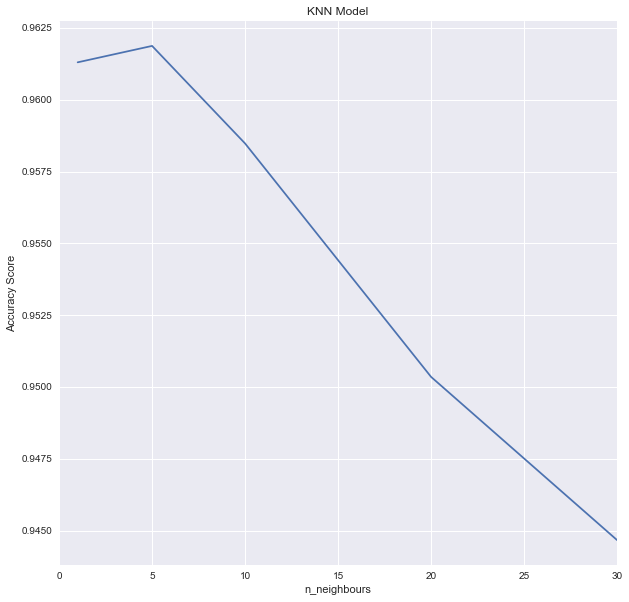

In [171]:
#Plotting accuracies vs n_neighbors
plt.figure(figsize=(10,10))
plt.plot([1, 5, 10, 20, 30], knn_accuracies)
plt.xlim([0.0, 30])
#plt.ylim([0.0, 1.0])
plt.title('KNN Model')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy Score')
plt.grid(True)

In [258]:
#Fitting knn model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [259]:
# save the model to disk
filename_knn = 'PickleFiles/finalized_knn_model.sav'
pickle.dump(knn, open(filename_knn, 'wb'))

In [261]:
#load the model from disk
loaded_knn_model = pickle.load(open(filename_knn, 'rb'))
result_knn = loaded_knn_model.score(Xtest, ytest)
print(result_knn)

0.9667619047619047


In [263]:
#Predicted values and Accuracy Score
predict_knn = loaded_knn_model.predict(Xtest)
print(metrics.accuracy_score(ytest, predict_knn))

0.9667619047619047


In [ ]:
#Visualize the predicted data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(Xtest[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_knn[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == predict_knn[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [264]:
#Confusion Matrix
cm = confusion_matrix(ytest,predict_knn)
print(cm)

[[1006    0    3    0    0    2    4    0    0    0]
 [   0 1182    5    0    0    0    1    1    1    0]
 [  11   10 1035    3    0    0    2   14    2    0]
 [   1    1    4 1035    0   10    0    8    5    6]
 [   1    9    0    0  990    0    4    2    0   28]
 [   2    1    1   10    0  899   13    0    1    3]
 [   2    1    0    0    1    3 1037    0    0    0]
 [   1   13    5    1    5    0    0 1094    0   10]
 [   4    8    1   24    5   26   10    2  906    9]
 [   4    2    2    4   10    3    2   22    0  967]]


C:\Users\vibho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


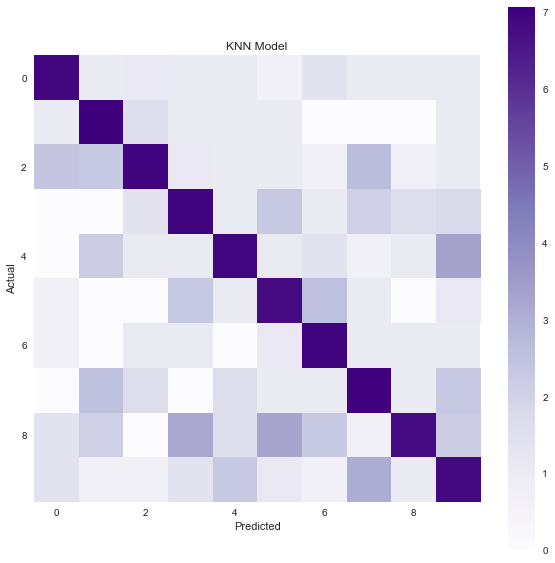

In [283]:
#Confusion Matrix Heatmap
plt.figure(figsize=(10,10))
plt.imshow(np.log(confusion_matrix(ytest,predict_knn)),cmap='Purples', interpolation='nearest')
plt.grid(False)
plt.colorbar ()
plt.title('KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted');

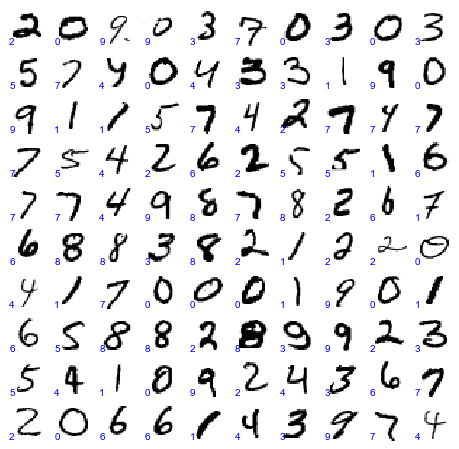

In [266]:
#Visualize the predicted data in test dataset
predict_act_knn = loaded_knn_model.predict(test)
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(test[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_act_knn[i]),
              transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# knn_accuracies01 - old

# [0.9613022979610678,
#  0.9554608148574214,
#  0.9632071610692335,
#  0.9618104864041473,
#  0.9618738978427217,
#  0.961588526127953,
#  0.9605721842264174,
#  0.9600647967666627,
#  0.9595885206097534]

# SVM

In [175]:
i=0
svm_accuracies = []
for n in [1, 5, 10]:
    svm = SVC(kernel='linear', C=n)
    svm_accuracies.append(cross_val_score(svm,Xtrain,ytrain,cv=5).mean())
    print ("n =",n,svm_accuracies[i])
    i=i+1

n = 1 0.9062869855696191
n = 5 0.9062869855696191
n = 10 0.9062869855696191


In [184]:
i=0
svm_accuracies01 = []
n_range = np.arange(0.01,0.1,0.01)
for n in n_range:
    svm = SVC(kernel='linear', C=1, gamma=n)
    svm_accuracies01.append(cross_val_score(svm,Xtrain,ytrain,cv=5).mean())
    print ("n =",n,svm_accuracies01[i])
    i=i+1

n = 0.01 0.9062869855696191
n = 0.02 0.9062869855696191
n = 0.03 0.9062869855696191
n = 0.04 0.9062869855696191
n = 0.05 0.9062869855696191
n = 0.060000000000000005 0.9062869855696191
n = 0.06999999999999999 0.9062869855696191
n = 0.08 0.9062869855696191
n = 0.09 0.9062869855696191


In [271]:
#Fitting svm model
svm=SVC(kernel='linear', C=1, gamma = 0.01)
svm.fit(Xtrain,ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [273]:
# save the model to disk
filename_svm_linear = 'PickleFiles/finalized_svm_linear_model.sav'
pickle.dump(knn, open(filename_svm_linear, 'wb'))

In [274]:
#load the model from disk
loaded_svm_linear_model = pickle.load(open(filename_svm_linear, 'rb'))
result_svm_linear = loaded_svm_linear_model.score(Xtest, ytest)
print(result_svm_linear)

0.9667619047619047


In [275]:
#Predicted values and Accuracy Score
predict_svm_linear = loaded_svm_linear_model.predict(Xtest)
print(metrics.accuracy_score(ytest, predict_svm_linear))

0.9667619047619047


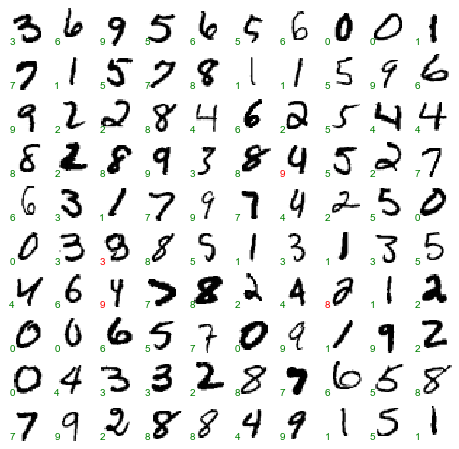

In [276]:
#Visualize the predicted data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(Xtest[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_knn[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == predict_knn[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [277]:
#Confusion Matrix
cm = confusion_matrix(ytest,predict_svm_linear)
print(cm)

[[1006    0    3    0    0    2    4    0    0    0]
 [   0 1182    5    0    0    0    1    1    1    0]
 [  11   10 1035    3    0    0    2   14    2    0]
 [   1    1    4 1035    0   10    0    8    5    6]
 [   1    9    0    0  990    0    4    2    0   28]
 [   2    1    1   10    0  899   13    0    1    3]
 [   2    1    0    0    1    3 1037    0    0    0]
 [   1   13    5    1    5    0    0 1094    0   10]
 [   4    8    1   24    5   26   10    2  906    9]
 [   4    2    2    4   10    3    2   22    0  967]]


C:\Users\vibho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


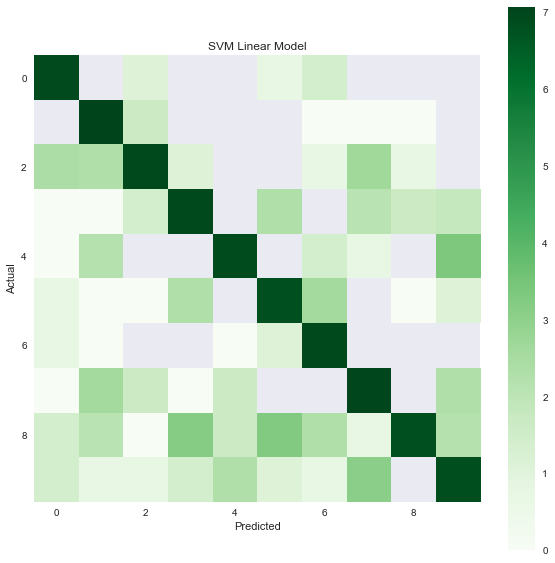

In [281]:
#Confusion Matrix Heatmap
plt.figure(figsize=(10,10))
plt.imshow(np.log(confusion_matrix(ytest,predict_svm_linear)),cmap='Greens', interpolation='nearest')
plt.grid(False)
plt.colorbar ()
plt.title('SVM Linear Model')
plt.ylabel('Actual')
plt.xlabel('Predicted');

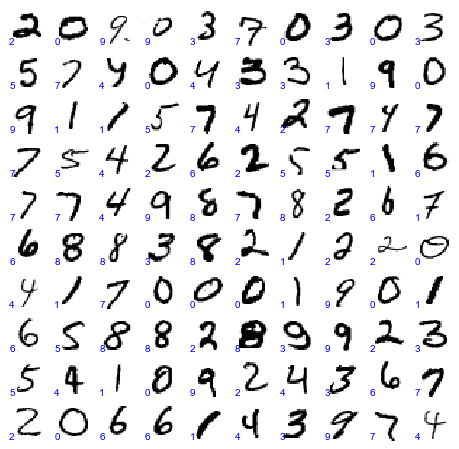

In [279]:
#Visualize the predicted data in test dataset
predict_act_knn = loaded_knn_model.predict(test)
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(test[i],[28,28]), cmap='binary')
    ax.text(0.05, 0.05, str(predict_act_knn[i]),
              transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

In [16]:
#Binarize y
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y.shape[1]

#Test-Train Split of Data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.25, random_state=0)



In [18]:
clf_dt2 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=15))
clf_dt2.fit(Xtrain,ytrain)
print('Step 1')
# save the model to disk
filename_dt2 = 'PickleFiles/finalized_dt2_model.sav'
pickle.dump(clf_dt2, open(filename_dt2, 'wb'))
print('Step 2')
# load the model from disk
loaded_dt2_model = pickle.load(open(filename_dt2, 'rb'))
#Predicted values
predict_dt2 = loaded_dt2_model.predict(Xtest)
print('Step 3')
#Accuracy Score
print(metrics.accuracy_score(ytest,predict_dt2, clf_dt2) * 100)
#fpr and tpr
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt [i], tpr_dt [i], _ = roc_curve(ytest[:, i], predict_dt2[:, i])
    print(fpr_dt [i],tpr_dt [i])

Step 1
Step 2
Step 3
78.39047619047619
[0.         0.01012124 1.        ] [0.         0.90738916 1.        ]
[0.         0.00988185 1.        ] [0.        0.9487395 1.       ]
[0.        0.0095511 1.       ] [0.         0.82915506 1.        ]
[0.         0.01749735 1.        ] [0.         0.82429907 1.        ]
[0.         0.01890978 1.        ] [0.         0.84332689 1.        ]
[0.         0.01337513 1.        ] [0.         0.83548387 1.        ]
[0.         0.00909475 1.        ] [0.         0.92337165 1.        ]
[0.        0.0078967 1.       ] [0.         0.86979628 1.        ]
[0.        0.0203051 1.       ] [0.         0.78894472 1.        ]
[0.         0.01528891 1.        ] [0.         0.77854331 1.        ]


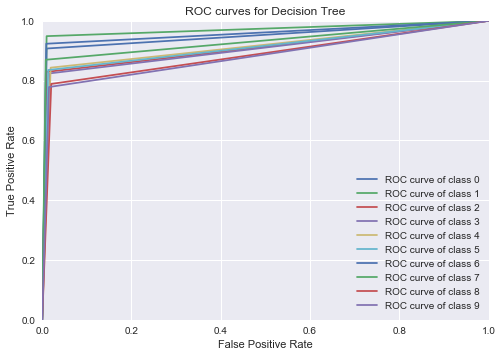

In [19]:
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label='ROC curve of class {0}'''.format(i))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curves for Decision Tree')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.legend()
    plt.grid(True)

In [21]:
clf_rf2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=90,max_depth=30))
clf_rf2.fit(Xtrain,ytrain)    
print('Step 1')
# save the model to disk
filename_rf2  = 'PickleFiles/finalized_rf2_model.sav'
pickle.dump(clf_rf2, open(filename_rf2, 'wb'))
print('Step 2')
# load the model from disk
loaded_rf2_model = pickle.load(open(filename_rf2, 'rb'))
#Predicted values
predict_rf2 = loaded_rf2_model.predict(Xtest)
print('Step 3')
#Accuracy Score
print(metrics.accuracy_score(ytest,predict_rf2, clf_rf2) * 100)
#fpr and tpr
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf [i], tpr_rf [i], _ = roc_curve(ytest[:, i], predict_rf2[:, i])
    print(fpr_rf [i],tpr_rf [i])

Step 1
Step 2
Step 3
88.4095238095238
[0.00000000e+00 8.43437006e-04 1.00000000e+00] [0.         0.94187192 1.        ]
[0.00000000e+00 3.22234157e-04 1.00000000e+00] [0.         0.96890756 1.        ]
[0.         0.00159185 1.        ] [0.         0.88300836 1.        ]
[0.00000000e+00 1.06044539e-04 1.00000000e+00] [0.         0.84392523 1.        ]
[0.00000000e+00 5.28206212e-04 1.00000000e+00] [0.         0.86750484 1.        ]
[0.00000000e+00 8.35945664e-04 1.00000000e+00] [0.         0.86021505 1.        ]
[0.         0.00158629 1.        ] [0.         0.93965517 1.        ]
[0.        0.0017074 1.       ] [0.         0.89282551 1.        ]
[0.00000000e+00 9.46870068e-04 1.00000000e+00] [0.  0.8 1. ]
[0.         0.00105441 1.        ] [0.         0.83759843 1.        ]


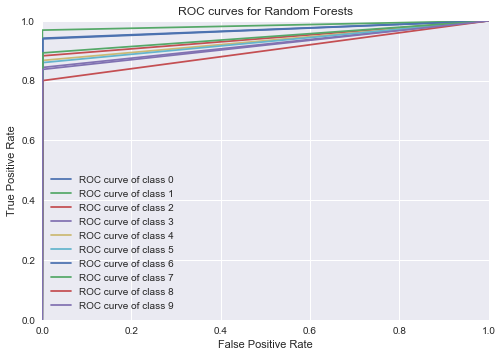

In [22]:
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label='ROC curve of class {0}'''.format(i))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curves for Random Forests')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.legend()
    plt.grid(True)

In [23]:
knn2 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn2.fit(Xtrain,ytrain)    
print('Step 1')
# save the model to disk
filename_knn2  = 'PickleFiles/finalized_knn2_model.sav'
pickle.dump(knn2, open(filename_knn2, 'wb'))
print('Step 2')
# load the model from disk
loaded_knn2_model = pickle.load(open(filename_knn2, 'rb'))
#Predicted values
predict_knn2 = loaded_knn2_model.predict(Xtest)
print('Step 3')
#Accuracy Score
print(metrics.accuracy_score(ytest,predict_knn2, clf_knn2) * 100)
#fpr and tpr
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn [i], tpr_knn [i], _ = roc_curve(ytest[:, i], predict_knn2[:, i])
    print(fpr_knn [i],tpr_knn [i])

Step 1
Step 2
Step 3


NameError: name 'clf_knn2' is not defined

In [24]:
#Accuracy Score
print(metrics.accuracy_score(ytest,predict_knn2, knn2) * 100)
#fpr and tpr
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn [i], tpr_knn [i], _ = roc_curve(ytest[:, i], predict_knn2[:, i])
    print(fpr_knn [i],tpr_knn [i])

96.39047619047619
[0.         0.00221402 1.        ] [0.         0.98916256 1.        ]
[0.         0.00429646 1.        ] [0.        0.9907563 1.       ]
[0.         0.00169797 1.        ] [0.         0.95636026 1.        ]
[0.         0.00318134 1.        ] [0.         0.96074766 1.        ]
[0.         0.00137334 1.        ] [0.         0.95357834 1.        ]
[0.         0.00323929 1.        ] [0.         0.96236559 1.        ]
[0.         0.00348985 1.        ] [0.         0.99329502 1.        ]
[0.         0.00469534 1.        ] [0.         0.96811337 1.        ]
[0.00000000e+00 8.41662283e-04 1.00000000e+00] [0.         0.90653266 1.        ]
[0.         0.00579924 1.        ] [0.         0.95177165 1.        ]


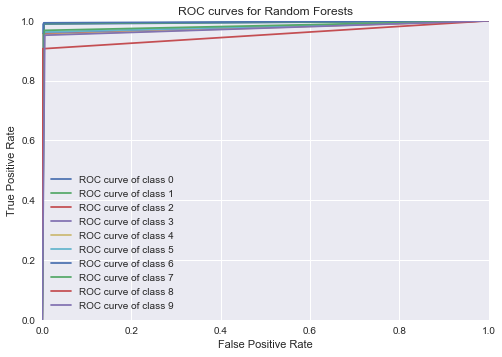

In [25]:
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label='ROC curve of class {0}'''.format(i))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curves for KNN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.legend()
    plt.grid(True)

In [ ]:
svm2 = OneVsRestClassifier(SVC(kernel='linear', C=1, gamma = 0.01))
svm2.fit(Xtrain,ytrain)    
print('Step 1')
# save the model to disk
filename_svm2  = 'PickleFiles/finalized_svm2_model.sav'
pickle.dump(svm2, open(filename_svm2, 'wb'))
print('Step 2')
# load the model from disk
loaded_svm2_model = pickle.load(open(filename_svm2, 'rb'))
#Predicted values
predict_svm2 = loaded_svm2_model.predict(Xtest)
print('Step 3')
#Accuracy Score
print(metrics.accuracy_score(ytest,predict_svm2, svm2) * 100)
#fpr and tpr
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
    fpr_svm [i], tpr_svm [i], _ = roc_curve(ytest[:, i], predict_svm2[:, i])
    print(fpr_svm [i],tpr_svm [i])